In [336]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from os import listdir
from os.path import isfile, join

from datetime import date, time, datetime

from tqdm import tqdm

import sys
sys._enablelegacywindowsfsencoding()

In [337]:
#Hurricanes
path_files = 'Result_py\Hurricane'
files =  [join(path_files, f) for f in listdir(path_files) if isfile(join(path_files, f))]

In [338]:
def create_lines(files):
    lines = []

    for file in files:    
        df_hurricane = pd.read_csv(file)
        corrs = list(zip(df_hurricane['LON'], df_hurricane['LAT']))

        i = 0
        while i != len(corrs) - 1:
            lines += [((corrs[i][0], corrs[i + 1][0]), (corrs[i][1], corrs[i + 1][1]))]
            i += 1
            
    return lines

In [339]:
lines = create_lines(files[37:38])

In [340]:
def get_coords(begin_time, end_time, path_dir):
    lat_lon = np.zeros((0, 2))
    
    for path_file in tqdm(listdir(path_dir)):
        full_path_file = join(path_dir, path_file)
        
        if not isfile(full_path_file):
            continue
            
        date_obsr = datetime(*list(map(int, path_file.split('.')[0].split('_'))), 0, 0)
        
        if (date_obsr < begin_time) or (end_time < date_obsr):
            continue
            
        obsr_df = pd.read_csv(full_path_file)
        obsr_df['time'] = obsr_df['time'].map(lambda x: datetime.combine(date_obsr, time(int(x.split(':')[0]), 0)))
        
        more = obsr_df['time'] >= begin_time
        less = obsr_df['time'] <= end_time
        valid_df = obsr_df[np.logical_and(more, less)]
        
        # temp for filter ion correction
        valid_df = valid_df[valid_df.Processing.str.contains("Cut off")]
        ##########################################
        
        lat_lon = np.vstack((lat_lon, valid_df[['Lat', 'Lon']]))
        
    return lat_lon

In [341]:
temp_df = pd.read_csv('Result_py\\Stat\\2014_01_01.csv', index_col=0)
temp_df.loc['Total']['Sum']

2090

In [351]:
path_coord_files = 'Result_py\\Coords\\'

begin_time = datetime(2014, 10, 14, 0, 1)
end_time = datetime(2014, 10, 25, 6, 0)

In [352]:
point = get_coords(begin_time, end_time, path_coord_files)

100%|███████████████████████████████████████| 365/365 [00:00<00:00, 444.68it/s]


In [354]:
point = np.array(list(filter(lambda x: x[1] > 117. and x[1] < 170. and x[0] > 0. and x[0] < 45., point)))
#point = np.array(list(filter(lambda x: (x[1] < -170. and x[0] > 10. and x[0] < 40.) or (x[1] > 160. and x[0] > 10. and x[0] < 40.), point)))
#point = np.array(list(filter(lambda x: -170 > x[1] > 160. and x[0] > 10. and x[0] < 40., point)))

In [355]:
point.shape

(4, 2)

C:\Users\Ignatov K\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Ignatov K\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


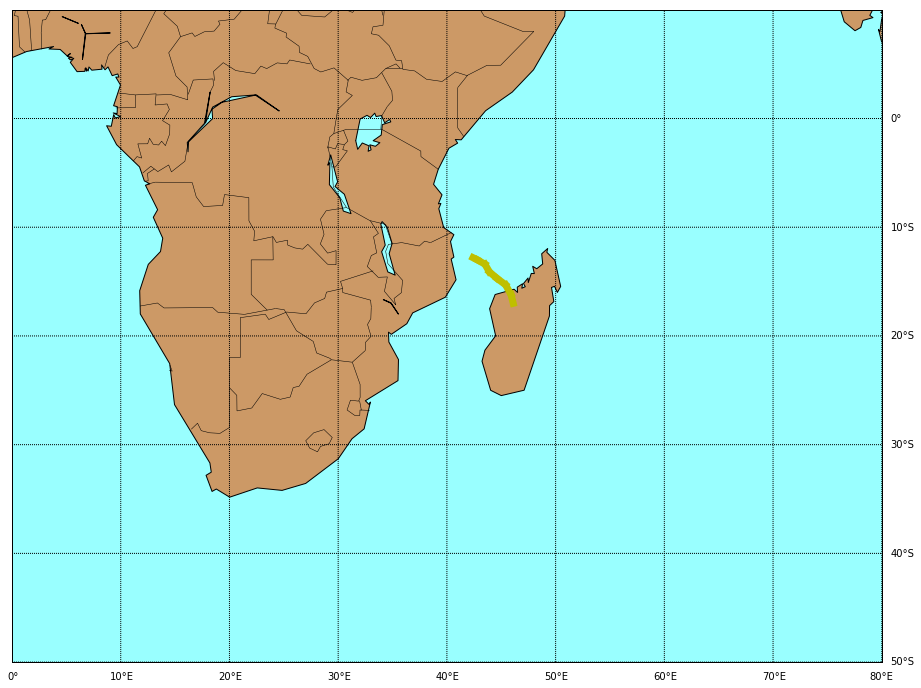

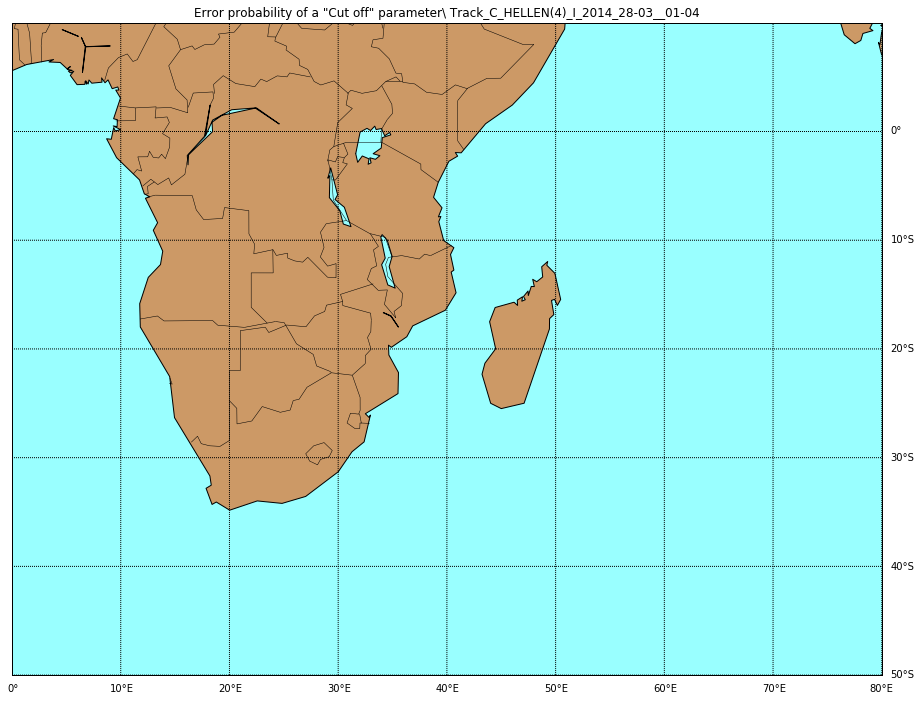

In [276]:
#set size figure
plt.figure(figsize=(24,12))

# create and set basemap
m = Basemap(llcrnrlon=0.,llcrnrlat=-50.,urcrnrlon=80.,urcrnrlat=10.)

for line in lines:
    m.plot(line[0], line[1], color='y', linewidth = 7)
    
"""m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

# read shapefile.
shp_info = m.readshapefile('huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []
for shapedict in m.hurrtracks_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)
# plot tracks of those storms.
for shapedict,shape in zip(m.hurrtracks_info,m.hurrtracks):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        # show part of track where storm > Cat 4 as thick red.
        if cat in ['H4','H5']:
            m.plot(xx,yy,linewidth=1.5,color='r')
        elif cat in ['H1','H2','H3']:
            m.plot(xx,yy,color='k')
            
        print (xx, yy)
            

# draw coastlines, meridians and parallels."""

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
#m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
#m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
parallels = np.arange(0.,-81,-10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(0.,351.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])

# plot
plt.scatter(point[:, 1], point[:, 0], c='red', alpha=0.7, zorder = 10)
#Error probability of a 
plt.title('Error probability of a "Cut off" parameter\ Track_C_HELLEN(4)_I_2014_28-03__01-04')
plt.show()